Name: Syed Umair Andrabi

Reg. No: 22MCB0015

In [1]:
%pip install networkx

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Question 1

1.1 Load the data 

1.2 Plot directed graph and undirected and save as png file

1.3 Get Adjacency Matrix for the undirected graph

1.4 Get Adjacency Matrix for the directed graph 

In [3]:
# Load CSV data into a Pandas dataframe
df = pd.read_csv('edges_list.csv')

In [4]:
def get_adj_matrix(node_dict):
  """
  Parameters:
      df (pandas.DataFrame): DataFrame representing the edges list of the graph.
  Returns:
      numpy.ndarray: Adjacency matrix of the graph.
  """
  # Create an empty adjacency matrix
  adj_matrix = np.zeros((len(node_dict), len(node_dict)))

  # Fill the adjacency matrix with edge weights
  for _, row in df.iterrows():
    src_idx = node_dict[row['src']]
    dst_idx = node_dict[row['dst']]
    adj_matrix[src_idx, dst_idx] = row['weight']

  return adj_matrix

In [5]:
def drawGraph(graph):  
  pos = nx.spring_layout(graph, k = 0.4, iterations=50)
  nx.draw(graph, pos, labels=node_labels, with_labels=True, node_size=500, font_color ='w')
  edge_labels = nx.get_edge_attributes(graph, 'weight')
  nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')  
  fig = plt.gcf()
  fig.set_size_inches(10, 8)
  if graph.is_directed():   
    fig.savefig('directed_graph.png', dpi=100) 
  else:
    fig.savefig('undirected_graph.png', dpi=100)
  
  plt.show()

In [6]:
# Create a dictionary that maps node names to indices in the adjacency matrix
node_dict = {node: i for i, node in enumerate(set(df['src']) | set(df['dst']))}

adj_matrix = get_adj_matrix(node_dict)

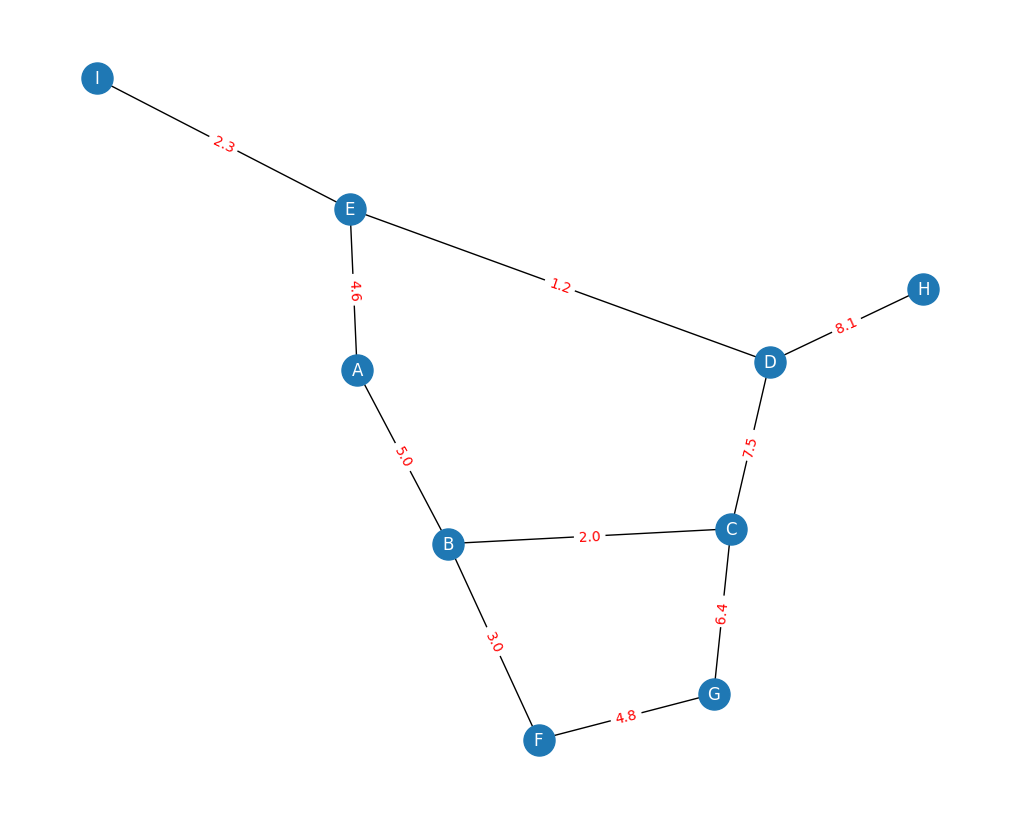

In [7]:
# Create a graph using the adjacency matrix
undirectedGraph = nx.Graph(adj_matrix)

# Set the node labels to be the node names
node_labels = {i: node for node, i in node_dict.items()}
nx.set_node_attributes(undirectedGraph, node_labels, 'label')

drawGraph(undirectedGraph)

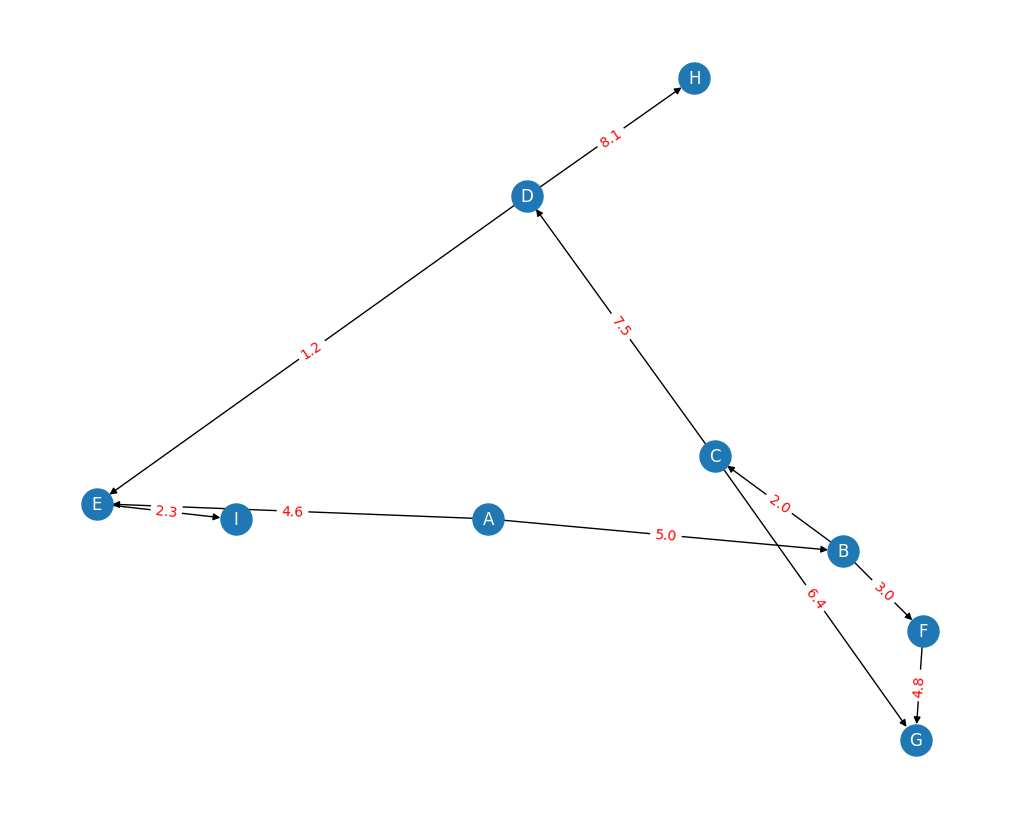

In [8]:
# Create a graph using the adjacency matrix
directedGraph = nx.DiGraph(adj_matrix)

# Set the node labels to be the node names
nx.set_node_attributes(directedGraph, node_labels, 'label')

drawGraph(directedGraph)

In [9]:
undirectedAdjacency = nx.to_numpy_array(undirectedGraph)
print(undirectedAdjacency)

[[0.  2.3 0.  0.  0.  0.  0.  0.  0. ]
 [2.3 0.  0.  0.  4.6 0.  0.  1.2 0. ]
 [0.  0.  0.  0.  0.  6.4 2.  7.5 0. ]
 [0.  0.  0.  0.  0.  4.8 3.  0.  0. ]
 [0.  4.6 0.  0.  0.  0.  5.  0.  0. ]
 [0.  0.  6.4 4.8 0.  0.  0.  0.  0. ]
 [0.  0.  2.  3.  5.  0.  0.  0.  0. ]
 [0.  1.2 7.5 0.  0.  0.  0.  0.  8.1]
 [0.  0.  0.  0.  0.  0.  0.  8.1 0. ]]


In [10]:
directedAdjacency = nx.to_numpy_array(directedGraph)
print(directedAdjacency)

[[0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [2.3 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  6.4 0.  7.5 0. ]
 [0.  0.  0.  0.  0.  4.8 0.  0.  0. ]
 [0.  4.6 0.  0.  0.  0.  5.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  2.  3.  0.  0.  0.  0.  0. ]
 [0.  1.2 0.  0.  0.  0.  0.  0.  8.1]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


# Question 2

## 2. 1 For undirected

2.1.1 Number of Nodes

2.1.2 Number of Edges

2.1.3 Nodes with Max Degree

2.1.4 Nodes with Min Degree

In [11]:
# Number of nodes
print("Number of nodes: " + str(undirectedGraph.number_of_nodes()))

# Nnumber of edges
print("Number of edges: " + str(undirectedGraph.number_of_edges()))

Number of nodes: 9
Number of edges: 10


In [12]:
# Node with max degree
max_degree = max(undirectedGraph.degree(), key=lambda x: x[1])[1] # (index, degree)
print(f"Nodes with maximum degree of {max_degree} are {[undirectedGraph.nodes[idx]['label'] for idx, deg in undirectedGraph.degree() if deg == max_degree]}")

# Node with min degree
min_degree = min(undirectedGraph.degree(), key=lambda x: x[1])[1]
print(f"Nodes with minimum degree of {min_degree} are {[undirectedGraph.nodes[idx]['label'] for idx, deg in undirectedGraph.degree() if deg == min_degree]}")

Nodes with maximum degree of 3 are ['E', 'C', 'B', 'D']
Nodes with minimum degree of 1 are ['I', 'H']


## 2. 2 For directed

2.2.1 Number of Nodes

2.2.2 Number of Edges

2.2.3 Node with Max and Min Out Degree

2.2.4 Node with Max and Min In Degree

In [13]:
# Number of nodes
print("Number of nodes: " + str(directedGraph.number_of_nodes()))

# Nnumber of edges
print("Number of edges: " + str(directedGraph.number_of_edges()))

Number of nodes: 9
Number of edges: 10


In [14]:
in_degrees = directedGraph.in_degree()
out_degrees = directedGraph.out_degree()

# Node with the maximum in-degree
max_indegree = max(in_degrees, key=lambda x: x[1])[1] # (index, degree)
print(f"Nodes with maximum in-degree of {max_indegree} are {[directedGraph.nodes[idx]['label'] for idx, deg in in_degrees if deg == max_indegree]}")

# Node with the minimum in-degree
min_indegree = min(in_degrees, key=lambda x: x[1])[1] # (index, degree)
print(f"Nodes with minimum in-degree of {min_indegree} are {[directedGraph.nodes[idx]['label'] for idx, deg in in_degrees if deg == min_indegree]}")

# Node with the maximum out-degree
max_outdegree = max(out_degrees, key=lambda x: x[1])[1] # (index, degree)
print(f"Nodes with maximum out-degree of {max_outdegree} are {[directedGraph.nodes[idx]['label'] for idx, deg in out_degrees if deg == max_outdegree]}")

# Print the node with the minimum out-degree
min_outdegree = min(in_degrees, key=lambda x: x[1])[1] # (index, degree)
print(f"Nodes with minimum out-degree of {min_outdegree} are {[directedGraph.nodes[idx]['label'] for idx, deg in out_degrees if deg == min_outdegree]}")

Nodes with maximum in-degree of 2 are ['E', 'G']
Nodes with minimum in-degree of 0 are ['A']
Nodes with maximum out-degree of 2 are ['C', 'A', 'B', 'D']
Nodes with minimum out-degree of 0 are ['I', 'G', 'H']


# Question 3
3.1 Sum of weights of all outgoing edges for each vertex (for undirected graph)

3.2 Sum of weights of all incoming and outgoing edges for each vertex (for directed graph)

In [15]:
print(undirectedGraph.edges(2, data=True))

[(2, 5, {'weight': 6.4}), (2, 7, {'weight': 7.5}), (2, 6, {'weight': 2.0})]


In [16]:
def sum_of_edges_weight():
  # Get the sum of weights of all outgoing edges for each vertex
  outgoing_weights = {}
  for node in undirectedGraph.nodes():
    outgoing_weights[node] = sum([edge[2]['weight'] for edge in undirectedGraph.edges(node, data=True)])

  # Print the sum of weights of outgoing edges for each vertex
  for node, weight in outgoing_weights.items():
    print(f"Node {undirectedGraph.nodes[node]['label']}: Sum of weights edges = {round(weight, 2)}")
sum_of_edges_weight()

Node I: Sum of weights edges = 2.3
Node E: Sum of weights edges = 8.1
Node C: Sum of weights edges = 15.9
Node F: Sum of weights edges = 7.8
Node A: Sum of weights edges = 9.6
Node G: Sum of weights edges = 11.2
Node B: Sum of weights edges = 10.0
Node D: Sum of weights edges = 16.8
Node H: Sum of weights edges = 8.1


In [17]:
# Get the sum of weights of all outgoing edges for each vertex
outgoing_weights = {}
for node in directedGraph.nodes():
    outgoing_weights[node] = sum([edge[2]['weight'] for edge in directedGraph.out_edges(node, data=True)])

# Get the sum of weights of all incoming edges for each vertex
incoming_weights = {}
for node in directedGraph.nodes():
    incoming_weights[node] = sum([edge[2]['weight'] for edge in directedGraph.in_edges(node, data=True)])

# Print the sum of weights of incoming and outgoing edges for each vertex
for node, outgoing_weight in outgoing_weights.items():
    incoming_weight = incoming_weights[node]
    print(f"Node {directedGraph.nodes[node]['label']}: Sum of weights of outgoing edges and incoming edges = {round(outgoing_weight + incoming_weight, 2)}")


Node I: Sum of weights of outgoing edges and incoming edges = 2.3
Node E: Sum of weights of outgoing edges and incoming edges = 8.1
Node C: Sum of weights of outgoing edges and incoming edges = 15.9
Node F: Sum of weights of outgoing edges and incoming edges = 7.8
Node A: Sum of weights of outgoing edges and incoming edges = 9.6
Node G: Sum of weights of outgoing edges and incoming edges = 11.2
Node B: Sum of weights of outgoing edges and incoming edges = 10.0
Node D: Sum of weights of outgoing edges and incoming edges = 16.8
Node H: Sum of weights of outgoing edges and incoming edges = 8.1


# Question 4
All Centralities for undirected graph and directed graph.

## Undirected

In [18]:
# Degree Centrality
degree_centrality = nx.degree_centrality(undirectedGraph)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(undirectedGraph)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(undirectedGraph)

# PageRank
page_rank = nx.pagerank(undirectedGraph)

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(undirectedGraph)

# Create a dictionary to hold the centrality measures for each node
centrality = {'Node': [], 'Degree Centrality': [], 'Betweenness Centrality': [], 'Closeness Centrality': [], 'PageRank': [], 'Eigenvector Centrality': []}

# Populate the dictionary with the centrality measures for each node
for node in undirectedGraph.nodes():
    centrality['Node'].append(undirectedGraph.nodes[node]['label'])
    centrality['Degree Centrality'].append(round(degree_centrality[node], 2))
    centrality['Betweenness Centrality'].append(round(betweenness_centrality[node], 2))
    centrality['Closeness Centrality'].append(round(closeness_centrality[node], 2))
    centrality['PageRank'].append(round(page_rank[node], 2))
    centrality['Eigenvector Centrality'].append(round(eigenvector_centrality[node], 2))

# Create a Pandas dataframe from the centrality dictionary
df2 = pd.DataFrame(centrality)
df2 = df2.sort_values(by=['Node'])

# Print the dataframe
print(df2.to_string(index=False))

Node  Degree Centrality  Betweenness Centrality  Closeness Centrality  PageRank  Eigenvector Centrality
   A               0.25                    0.14                  0.50      0.12                    0.32
   B               0.38                    0.23                  0.53      0.12                    0.44
   C               0.38                    0.32                  0.57      0.15                    0.46
   D               0.38                    0.39                  0.57      0.16                    0.39
   E               0.38                    0.32                  0.53      0.11                    0.34
   F               0.25                    0.04                  0.40      0.09                    0.30
   G               0.25                    0.05                  0.42      0.12                    0.31
   H               0.12                    0.00                  0.38      0.08                    0.16
   I               0.12                    0.00                 

In [19]:
# Function to append the rows 
def add_value(df,centrality):
  map={}
  map['Centrality']= centrality
  map['min node']= df['Node'].iloc[df[centrality].idxmin()]
  map['min score']= df[centrality].min()
  map['max node']= df['Node'].iloc[df[centrality].idxmax()]
  map['max score']= df[centrality].max() 
  return map

# Create a list of dictionaries containing centrality measures and corresponding nodes
centrality_list = [
    add_value(df2, 'Degree Centrality'),
    add_value(df2, 'Betweenness Centrality'),
    add_value(df2, 'Closeness Centrality'),
    add_value(df2, 'PageRank'),
    add_value(df2, 'Eigenvector Centrality'),
]

# Create a new dataframe with the list of dictionaries
df3 = pd.DataFrame(centrality_list)

# Set the index to be the centrality measure
df3 = df3.set_index('Centrality')

# Display the dataframe with formatted values
print("Centrality Measures and Corresponding Nodes:\n")
print(df3.to_string(formatters={
    'min score': '{:.2f}'.format,
    'max score': '{:.2f}'.format
}))


Centrality Measures and Corresponding Nodes:

                       min node min score max node max score
Centrality                                                  
Degree Centrality             I      0.12        G      0.38
Betweenness Centrality        I      0.00        H      0.39
Closeness Centrality          A      0.36        C      0.57
PageRank                      A      0.04        H      0.16
Eigenvector Centrality        A      0.14        C      0.46


## Directed

In [20]:
# Degree Centrality
in_degree_centrality = nx.in_degree_centrality(directedGraph)
out_degree_centrality = nx.out_degree_centrality(directedGraph)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(directedGraph)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(directedGraph)

# PageRank
page_rank = nx.pagerank(directedGraph)

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality_numpy(directedGraph)

# Create a dictionary to hold the centrality measures for each node
centrality = {'Node': [], 'In-Degree Centrality': [], 'Out-Degree Centrality': [], 'Betweenness Centrality': [], 'Closeness Centrality': [], 'PageRank': [], 'Eigenvector Centrality': []}

# Populate the dictionary with the centrality measures for each node
for node in directedGraph.nodes():
    centrality['Node'].append(directedGraph.nodes[node]['label'])
    centrality['In-Degree Centrality'].append(round(in_degree_centrality[node], 2))
    centrality['Out-Degree Centrality'].append(round(out_degree_centrality[node], 2))
    centrality['Betweenness Centrality'].append(round(betweenness_centrality[node], 2))
    centrality['Closeness Centrality'].append(round(closeness_centrality[node], 2))
    centrality['PageRank'].append(round(page_rank[node], 2))
    centrality['Eigenvector Centrality'].append(round(eigenvector_centrality[node], 2))

# Create a Pandas dataframe from the centrality dictionary
df4 = pd.DataFrame(centrality)
df4 = df4.sort_values(by=['Node'])

# Print the dataframe
print(df4.to_string(index=False))


Node  In-Degree Centrality  Out-Degree Centrality  Betweenness Centrality  Closeness Centrality  PageRank  Eigenvector Centrality
   A                  0.00                   0.25                    0.00                  0.00      0.06                     0.0
   B                  0.12                   0.25                    0.09                  0.12      0.09                     0.0
   C                  0.12                   0.25                    0.12                  0.17      0.09                     0.0
   D                  0.12                   0.25                    0.12                  0.19      0.10                     0.0
   E                  0.25                   0.12                    0.07                  0.29      0.10                     0.0
   F                  0.12                   0.12                    0.02                  0.17      0.10                     0.0
   G                  0.25                   0.00                    0.00                 

In [21]:
centrality_list = [
    add_value(df4, 'In-Degree Centrality'),
    add_value(df4, 'Out-Degree Centrality'),
    add_value(df4, 'Betweenness Centrality'),
    add_value(df4, 'Closeness Centrality'),
    add_value(df4, 'PageRank'),
    add_value(df4, 'Eigenvector Centrality'),
]

# Create a new dataframe with the list of dictionaries
df5 = pd.DataFrame(centrality_list)

# Set the index to be the centrality measure
df5 = df5.set_index('Centrality')

# Display the dataframe with formatted values
print("Centrality Measures and Corresponding Nodes:\n")
print(df5.to_string(formatters={
  'min score': '{:.2f}'.format,
  'max score': '{:.2f}'.format
}))

Centrality Measures and Corresponding Nodes:

                       min node min score max node max score
Centrality                                                  
In-Degree Centrality          E      0.00        B      0.25
Out-Degree Centrality         F      0.00        E      0.25
Betweenness Centrality        E      0.00        C      0.12
Closeness Centrality          E      0.00        B      0.29
PageRank                      E      0.06        F      0.18
Eigenvector Centrality        E      0.00        A      1.00
